In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [152]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [154]:
##DAta cleaning
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [155]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [157]:
df[['Region']]=df[['Region']].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [158]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [159]:
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [160]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [161]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [162]:
df=df.drop(122).reset_index(drop=True)

In [163]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [164]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [165]:
##Fix saces in column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       245 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.8+ KB


Change the req columns as int datatype


In [167]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

ValueError: invalid literal for int() with base 10: 'month'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


Change the req columns as float datatype

In [ ]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [ ]:
for i in objects:
    if i != 'Classes':
        df[i] = pd.to_numeric(df[i], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


EDA

In [ ]:
df_copy=df.drop(['day','month','year'],axis=1)

In [ ]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [ ]:
df_copy=df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [ ]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
df_copy['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

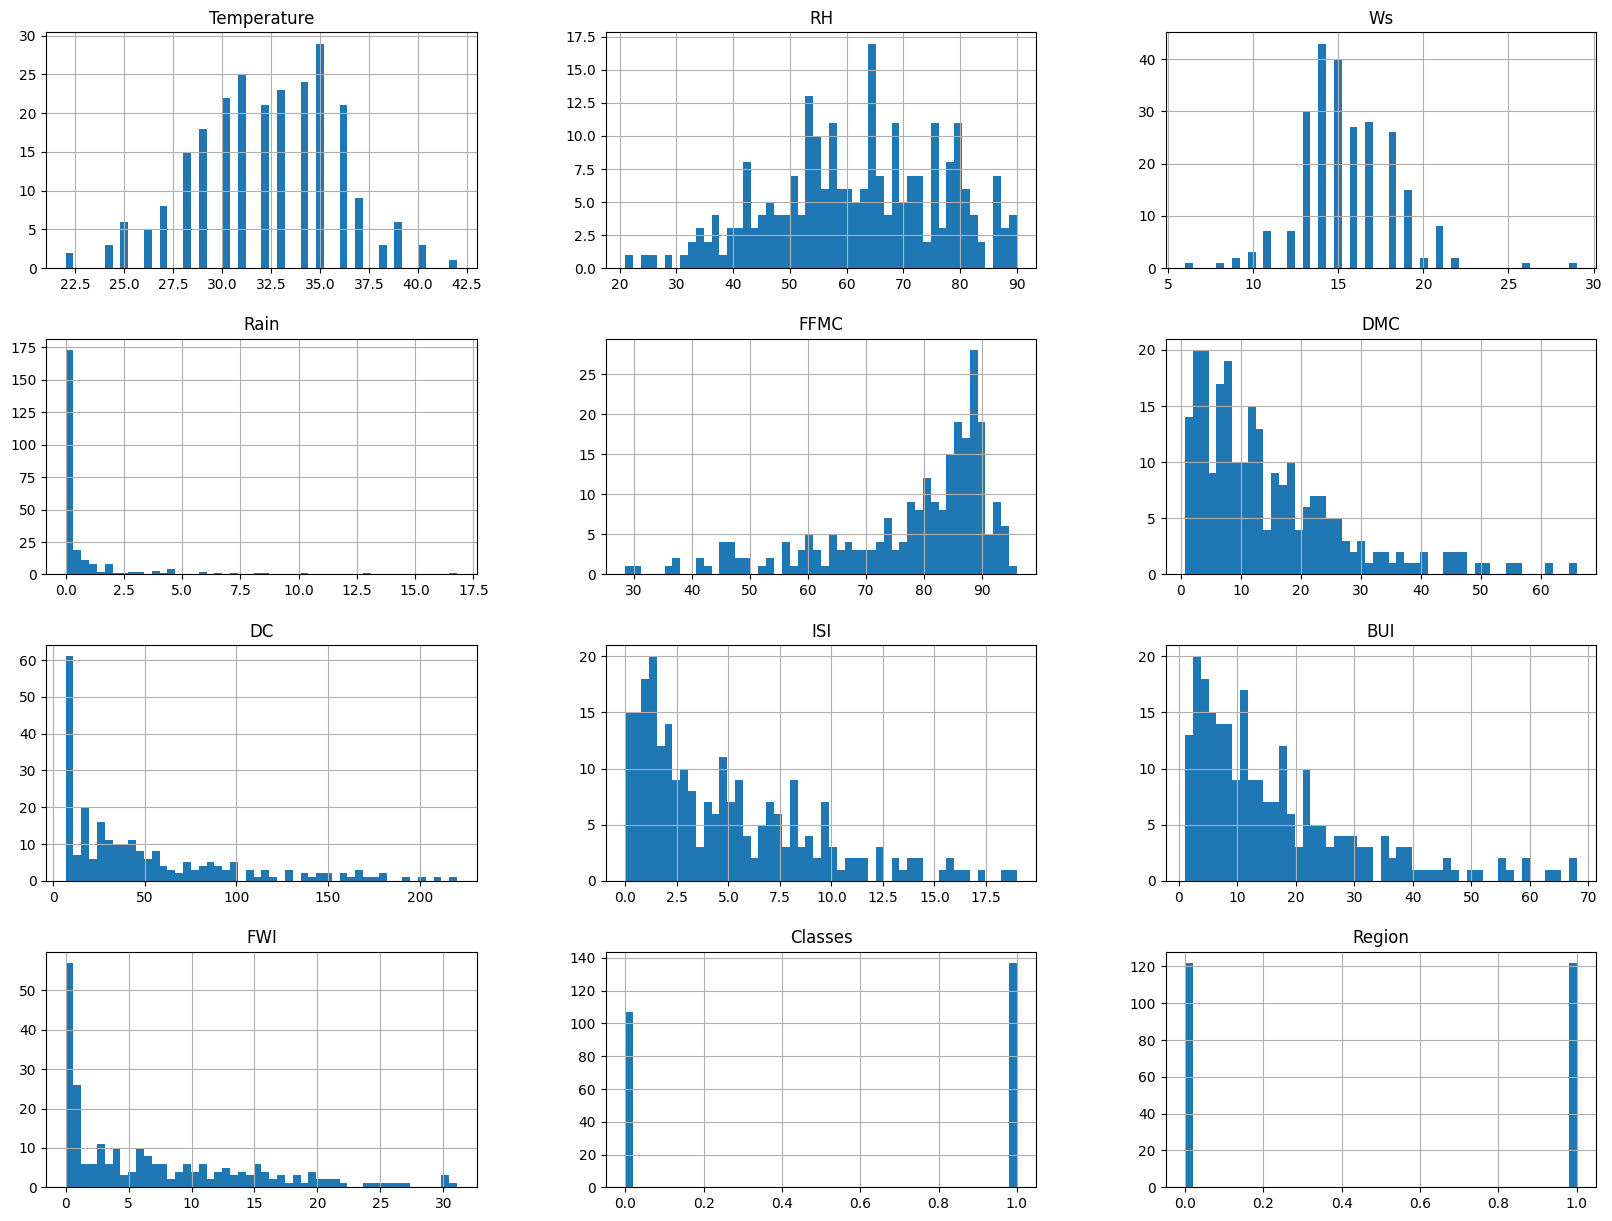

In [ ]:

df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'PieChart of Classes')

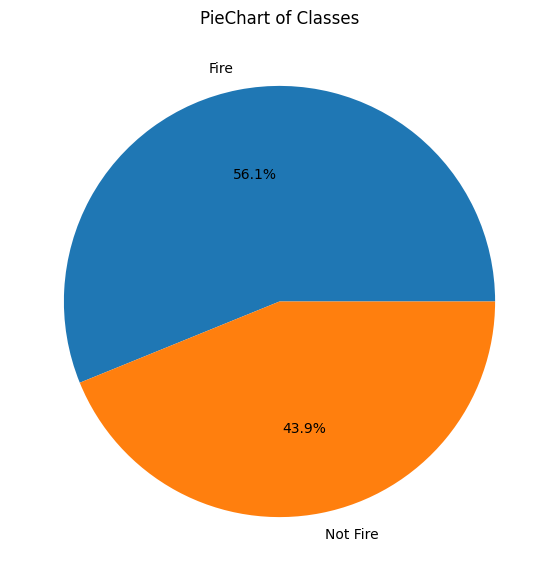

In [ ]:
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("PieChart of Classes")

In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.566670,0.506575,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.580957,-0.420695,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032368,-0.073810,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324422,-0.376727,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.691132,0.762942,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875864,0.584757,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.739521,0.512615,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.922895,0.719419,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857973,0.586915,0.087370
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

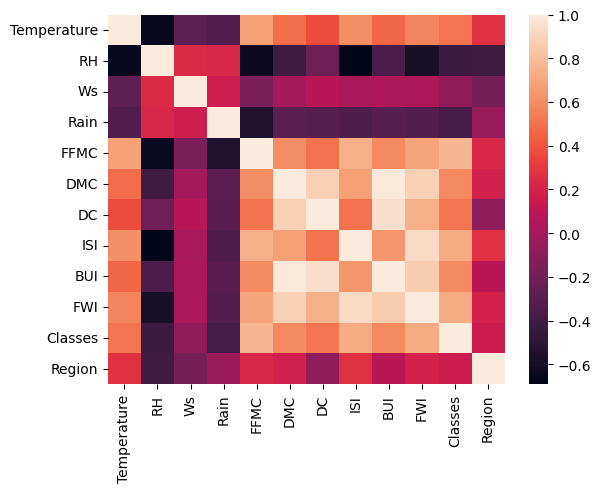

In [ ]:
sns.heatmap(df_copy.corr())

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

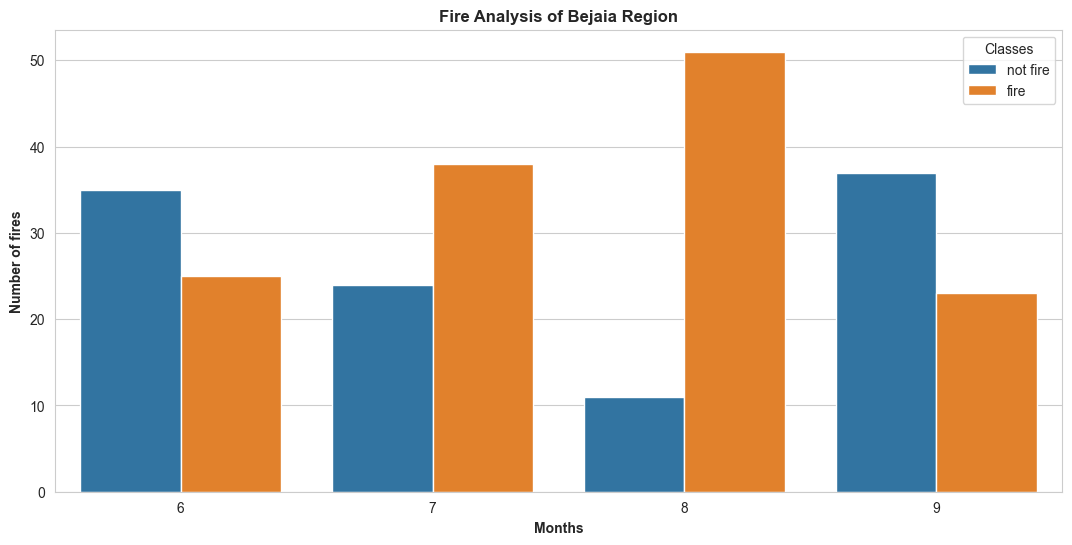

In [ ]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x="month",hue="Classes",data=df)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejaia Region",weight='bold')


Feature Selection

In [ ]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.drop(['month','day','year'],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [ ]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

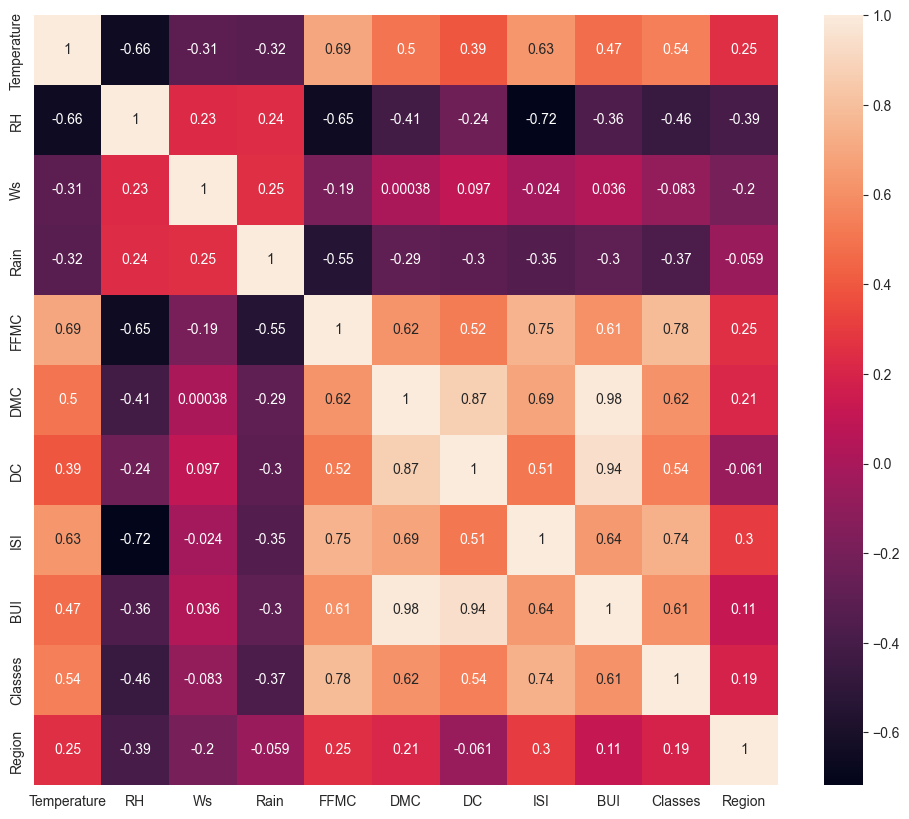

In [ ]:
##Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [169]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [170]:
#threshold domain expertise
corr_features=correlation(X_train,0.85)

In [171]:
corr_features

set()

In [172]:
#Drop features when correlation is more than o.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [ ]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

Text(0.5, 1.0, 'X_train After Scaling')

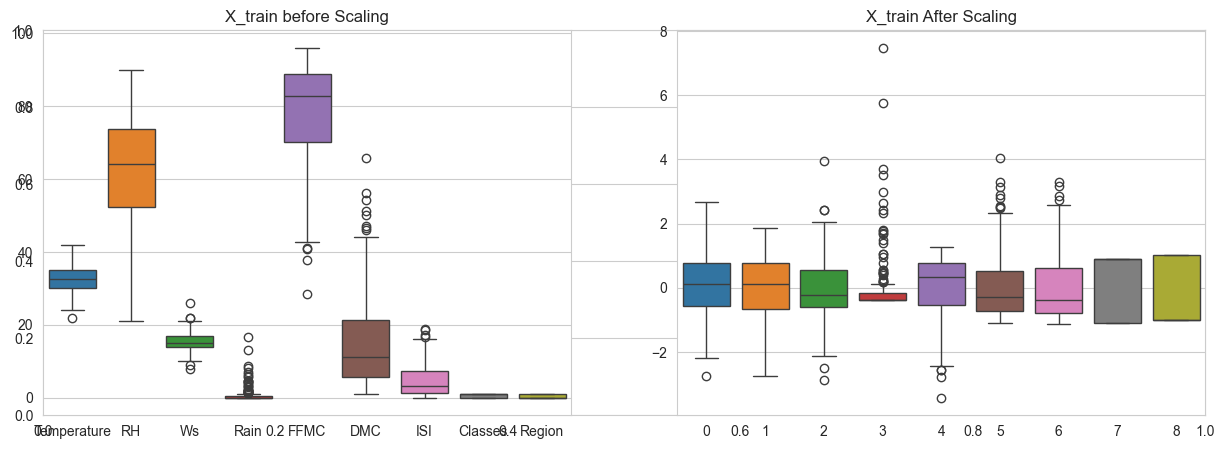

In [ ]:
#Boxplot to understand the effects of Standard Scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Model Training

0.5468236465249978
0.9847657384266951


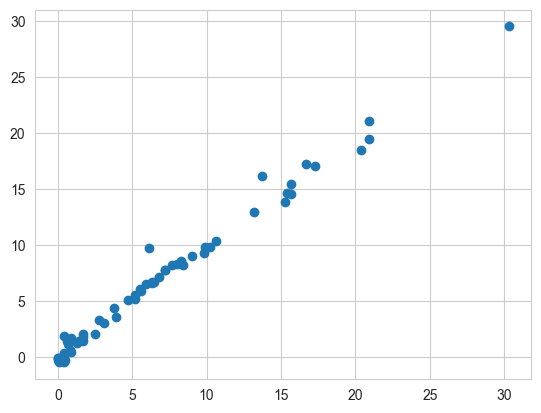

In [ ]:
##Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.133175994914409
0.9492020263112388


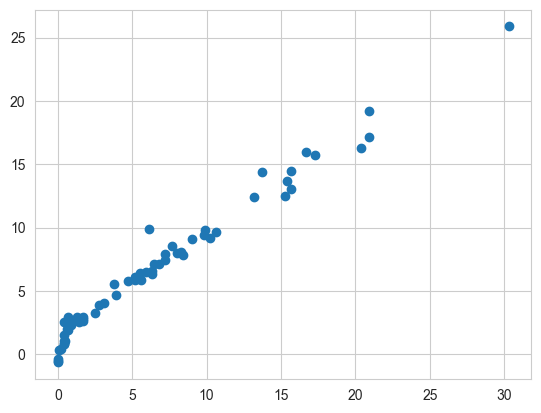

In [ ]:
##Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

0.5642305340105715
0.9842993364555512


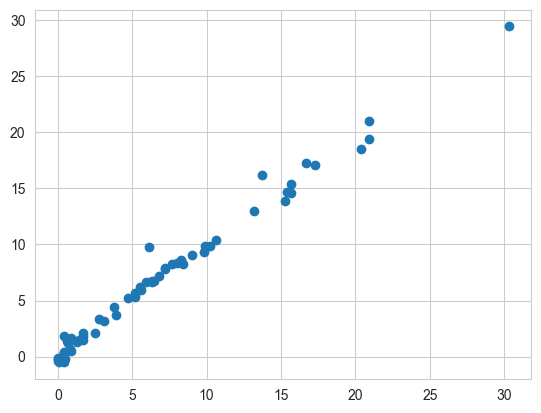

In [ ]:
##RidgeRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.8822353634896005
0.8753460589519703


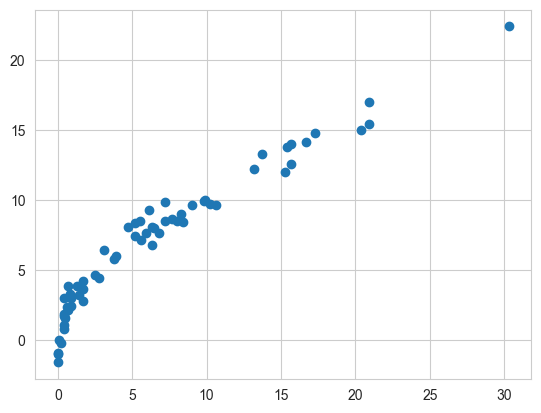

In [ ]:
##ElasticNetRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
en=ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred=en.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

CrossValidation Lasso

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


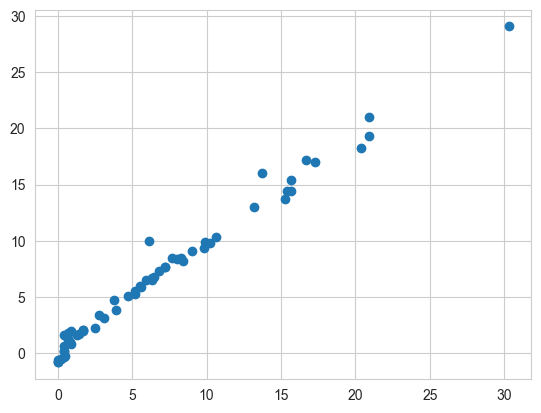

In [ ]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

In [ ]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [ ]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

CrossValidation Ridge

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [ ]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [ ]:
ridgecv.get_params

<bound method BaseEstimator.get_params of RidgeCV(cv=5)>

Pickling

In [173]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))